In [2]:
# Cell 1: Setup, Drive Mount, and Configuration
from google.colab import drive
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os

# --- 1. PROJECT CONFIGURATION ---
TIME_STEPS = 50
DATASET_NAME = "tourism"
N_FEATURES = 1 # Univariate (only 'Visitors' count)

# --- 2. MOUNT GOOGLE DRIVE (This is the critical fix) ---
# force_remount=True ensures the connection is fresh and requests authorization.
drive.mount('/content/drive', force_remount=True)

# **3. DEFINE SAVE PATH**
# Using your new, corrected folder name: L_GTA_model_DATA
DRIVE_PATH = '/content/drive/MyDrive/Colab Notebooks/L_GTA_model_DATA/'

print(f"Configuration set: Sequence Length={TIME_STEPS}")
print(f"Save Path set to: {DRIVE_PATH}")

Mounted at /content/drive
Configuration set: Sequence Length=50
Save Path set to: /content/drive/MyDrive/Colab Notebooks/L_GTA_model_DATA/


In [3]:
# Cell 2: File Upload and Initial Load

print("\nPlease upload 'tourism_dataset.csv' now.")
try:
    # 1. Prompts for file upload
    uploaded = files.upload()

    # 2. Load the CSV. Assumes the filename is 'tourism_dataset.csv'
    df = pd.read_csv("tourism_dataset.csv", sep=',')

    print("\nFile uploaded and loaded successfully.")
    print(df.head())

except KeyError:
    print("❌ ERROR: 'tourism_dataset.csv' not found. Please ensure the file was uploaded.")
    exit()


Please upload 'tourism_dataset.csv' now.


Saving tourism_dataset.csv to tourism_dataset.csv

File uploaded and loaded successfully.
     Location Country    Category  Visitors  Rating    Revenue  \
0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4  WJCCQlepnz  France    Cultural    124867    1.43  547893.24   

  Accommodation_Available  
0                     Yes  
1                      No  
2                     Yes  
3                     Yes  
4                      No  


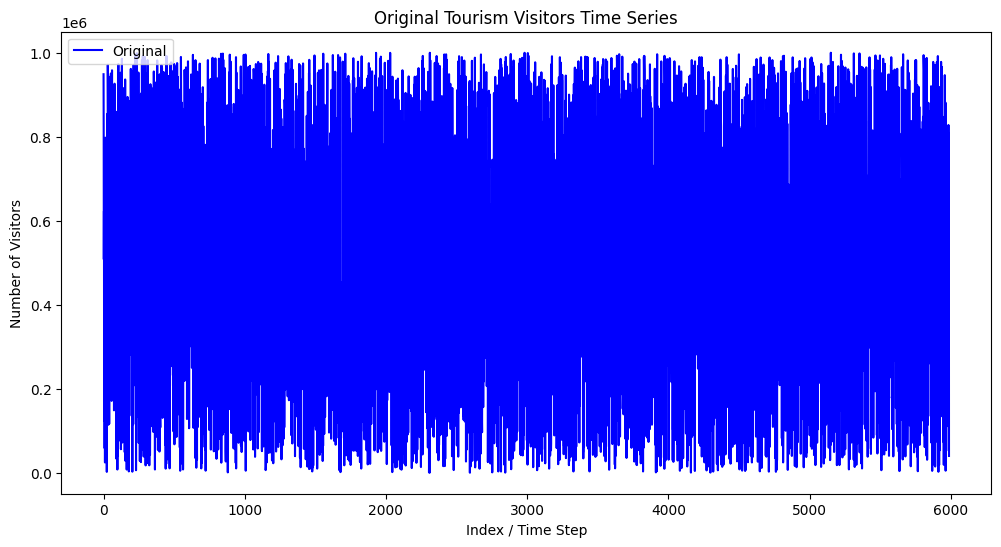

Total Scaled Data Points: 5989


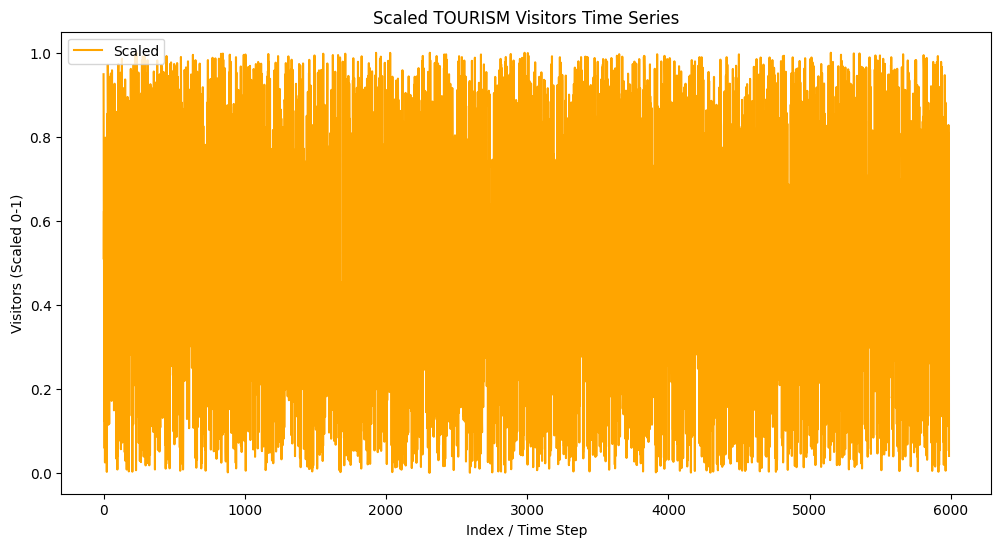

In [4]:
# Cell 3: Data Cleaning, Scaling, and Visualization

# Cleaning: Convert 'Visitors' column to numeric, handling errors (if any)
df['Visitors'] = pd.to_numeric(df['Visitors'], errors='coerce')
df = df.dropna(subset=['Visitors'])

# Visualization of Original Data (for initial checking)
plt.figure(figsize=(12,6))
plt.plot(df['Visitors'], label='Original', color='blue')
plt.title("Original Tourism Visitors Time Series")
plt.xlabel("Index / Time Step")
plt.ylabel("Number of Visitors")
plt.legend()
plt.show()

# Scaling: Use MinMaxScaler to scale data between 0 and 1
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(df[['Visitors']])

print(f"Total Scaled Data Points: {len(time_series_scaled)}")

# Visualization of Scaled Data
plt.figure(figsize=(12,6))
plt.plot(time_series_scaled, label='Scaled', color='orange')
plt.title(f"Scaled {DATASET_NAME.upper()} Visitors Time Series")
plt.xlabel("Index / Time Step")
plt.ylabel("Visitors (Scaled 0-1)")
plt.legend()
plt.show()

In [5]:
# Cell 4: Sequence Creation and Train/Test Split

def create_sequences(data, time_steps):
    """Converts the time series array into overlapping fixed-length sequences."""
    X = []
    # Ensure data is 2D for indexing consistency
    data = data.reshape(-1, N_FEATURES)
    for i in range(len(data) - time_steps + 1):
        X.append(data[i:i + time_steps])
    return np.array(X)

# Create the sequences
X_sequences = create_sequences(time_series_scaled, TIME_STEPS)

# Train/Test Split (80% Train, 20% Test)
X_train, X_test = train_test_split(X_sequences, test_size=0.2, random_state=42)

print(f"Final Sequence Shape: {X_sequences.shape}")
print(f"Final Training Data Shape: {X_train.shape}")
print(f"Final Testing Data Shape: {X_test.shape}")

Final Sequence Shape: (5940, 50, 1)
Final Training Data Shape: (4752, 50, 1)
Final Testing Data Shape: (1188, 50, 1)


In [6]:
# Cell 5: Final Save to Google Drive

# 1. GUARANTEE THE DIRECTORY EXISTS
try:
    os.makedirs(DRIVE_PATH, exist_ok=True)
    print(f"Verified or created directory: {DRIVE_PATH}")
except Exception as e:
    # This should not fail if Cell 1 was successful.
    print(f"CRITICAL ERROR: Directory access failed. Error: {e}")
    exit()

# 2. SAVE THE ARRAYS
np.save(f'{DRIVE_PATH}{DATASET_NAME}_X_train.npy', X_train)
np.save(f'{DRIVE_PATH}{DATASET_NAME}_X_test.npy', X_test)

print(f"\n✅ Data saved successfully and permanently to Drive:")
print(f"   - {DRIVE_PATH}{DATASET_NAME}_X_train.npy")
print(f"   - {DRIVE_PATH}{DATASET_NAME}_X_test.npy")

Verified or created directory: /content/drive/MyDrive/Colab Notebooks/L_GTA_model_DATA/

✅ Data saved successfully and permanently to Drive:
   - /content/drive/MyDrive/Colab Notebooks/L_GTA_model_DATA/tourism_X_train.npy
   - /content/drive/MyDrive/Colab Notebooks/L_GTA_model_DATA/tourism_X_test.npy
